In [1]:
import sys
import collections
import matplotlib.pyplot as plt
import numpy as np
from scipy import special
import math

sys.path.append("/home/salmon/workspace/freegs/")
sys.path.append("/home/salmon/workspace/fytok/python")
sys.path.append("/home/salmon/workspace/SpDev/SpDB")

from spdm.util.logger import logger
from spdm.data.Collection import Collection
from fytok.Tokamak import Tokamak
from spdm.util.logger import logger
from spdm.data.Profile import Profile
from spdm.data.Entry import open_entry
from fytok.Plot import plot_profiles
from spdm.data.AttributeTree import _next_

2020-12-12 10:48:30,112 DEBUG [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/util/sp_export.py:77:sp_find_module: Can not find module spdm.data.plugins.Plugineast#eastCollection
2020-12-12 10:48:30,113 DEBUG [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/util/sp_export.py:77:sp_find_module: Can not find module spdm.data.plugins.PluginEast#EastCollection
2020-12-12 10:48:30,114 DEBUG [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/util/sp_export.py:75:sp_find_module: Found module : spdm.data.plugins.PluginEAST#EASTCollection
2020-12-12 10:48:30,115 INFO [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/data/Plugin.py:88:find_plugin: Load Plugin: EASTCollection
2020-12-12 10:48:30,117 DEBUG [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/util/sp_export.py:75:sp_find_module: Found module : spdm.data.plugins.PluginMDSplus#MDSplusCollection
2020-12-12 10:48:30,118 INFO [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/data/Plugin.py:88:find_plugin: Load Plugin: MDSplusCollection
2020-12-12 10:48:30,119 D

<AxesSubplot:xlabel='Major radius $R$ [m]', ylabel='Height $Z$ [m]'>

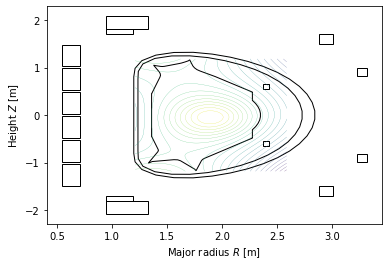

In [7]:
tok = Tokamak(open_entry("east+mdsplus:///home/salmon/public_data/~t/?tree_name=efit_east", shot=55555, time_slice=20))
tok.wall.plot()
tok.pf_active.plot()
tok.equilibrium.plot(oxpoints=False,boundary=False)

[(2.4, 0.0, 1.35, 0.0), (2.24, 0.52, 1.35, -0.45), (1.35, 0.45, 2.24, -0.52)]
2020-12-12 10:49:05,260 DEBUG [spdm] /home/salmon/workspace/fytok/python/fytok/Equilibrium.py:147:update: Solve Equilibrium [EquilibriumFreeGS] at: Start
2020-12-12 10:49:06,722 DEBUG [spdm] /home/salmon/workspace/fytok/python/fytok/plugins/equilibrium/PluginFreeGS.py:86:_solve: Create Profile: Constrain poloidal Beta and plasma current
                     Betap                      =0.23003898995193187 [-],
                     Plasma current Ip          =332862.90486653644 [Amps],
                     fvac                       =4.018389737368528 [T.m]
2020-12-12 10:49:06,724 DEBUG [spdm] /home/salmon/workspace/fytok/python/fytok/plugins/equilibrium/PluginFreeGS.py:114:_solve: [(2.4, 0.0, 1.35, 0.0), (2.24, 0.52, 1.35, -0.45), (1.35, 0.45, 2.24, -0.52)]
2020-12-12 10:49:10,976 DEBUG [spdm] /home/salmon/workspace/fytok/python/fytok/plugins/equilibrium/PluginFreeGS.py:127:_solve: Solve G-S equation Done
2020

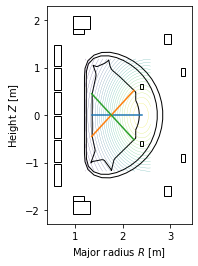

In [10]:
control_line=[
    
    ((1.99,0    ),    (2.40, 0     )   ),     # isoflux01
    ((1.93, 0.15),    (2.24, 0.52  )  ),   # isoflux03
    ((1.72, 0.24),    (1.35, 0.45  )  ),   # isoflux04
    ((1.66,0    ),    (1.35, 0     )   ),     # isoflux06
    ((1.72,-0.24) ,   (1.35, -0.45 )   ),    # isoflux08
    ((1.93,-0.15),    (2.24, -0.52 )   ),   # isoflux09
    ]                          

r=1.0
pts=[ ((1.0-r)*b[0] + r*e[0], (1.0-r)*b[1] + r*e[1] )  for b,e in control_line  ]

isoflux=[
    (*pts[0],*pts[3]),
    (*pts[1],*pts[4]),
    (*pts[2],*pts[5]),
    
] 
print(isoflux)

for r0,z0,r1,z1 in isoflux:
    plt.plot([r0,r1],[z0,z1])
  
xpoints=[(1.63,-0.83),(1.63,0.83)]





tok.equilibrium.update(
    constraints={
        # "psivals": psivals,
        "xpoints": xpoints,
        "isoflux": isoflux
    })

tok.wall.plot()
tok.pf_active.plot()
tok.equilibrium.plot(oxpoints=False,boundary=False)
plt.gca().set_aspect('equal')